2) Salary_hike -> Build a prediction model for Salary_hike

Build a simple linear regression model by performing EDA and do necessary transformations and select the best model.

In [1]:
#importing libraries
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import warnings 
warnings.filterwarnings("ignore")

In [2]:
#importing data set
import pandas as pd
data=pd.read_csv("Salary_Data.csv")
data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [3]:
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

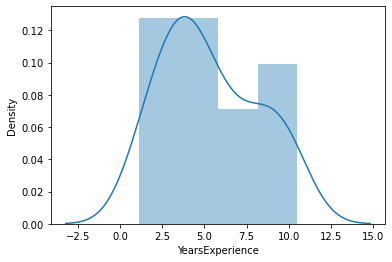

In [5]:
sns.distplot(data['YearsExperience'])

<AxesSubplot:xlabel='Salary', ylabel='Density'>

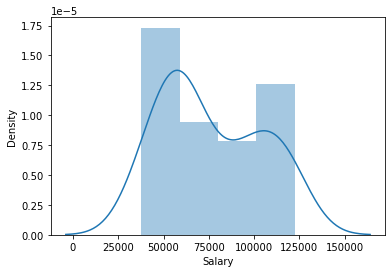

In [6]:
sns.distplot(data['Salary'])

In [7]:
data.isna().sum()

YearsExperience    0
Salary             0
dtype: int64

In [8]:
data.dtypes

YearsExperience    float64
Salary             float64
dtype: object

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

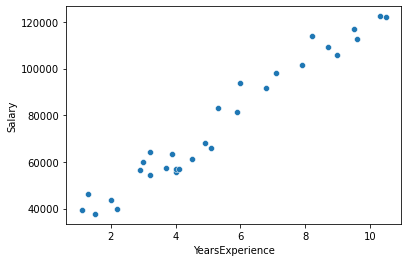

In [9]:
sns.scatterplot(x='YearsExperience', y='Salary', data=data)

In [10]:
data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [11]:
data1=data.rename(columns={'YearsExperience':'YE','Salary':'Sal'})
data1

,YE,Sal
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [12]:
#building the SLR model
model = smf.ols("Sal~YE",data=data1).fit()

<AxesSubplot:xlabel='YE', ylabel='Sal'>

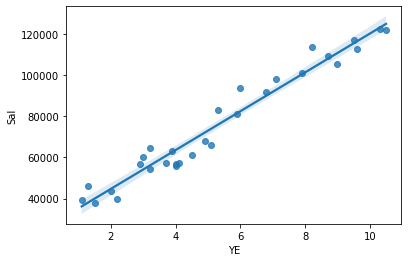

In [13]:
sns.regplot(x='YE', y='Sal', data=data1)

In [14]:
model.params

Intercept    25792.200199
YE            9449.962321
dtype: float64

In [15]:
data1.head(2)

,YE,Sal
0,1.1,39343.0
1,1.3,46205.0


In [16]:
model.fittedvalues

0      36187.158752
1      38077.151217
2      39967.143681
3      44692.124842
4      46582.117306
5      53197.090931
6      54142.087163
7      56032.079627
8      56032.079627
9      60757.060788
10     62647.053252
11     63592.049484
12     63592.049484
13     64537.045717
14     68317.030645
15     72097.015574
16     73987.008038
17     75877.000502
18     81546.977895
19     82491.974127
20     90051.943985
21     92886.932681
22    100446.902538
23    103281.891235
24    108006.872395
25    110841.861092
26    115566.842252
27    116511.838485
28    123126.812110
29    125016.804574
dtype: float64

In [17]:
data1['Predicted']=model.fittedvalues
data1.head(2)

,YE,Sal,Predicted
0,1.1,39343.0,36187.158752
1,1.3,46205.0,38077.151217


In [18]:
data1['Error']=data1['Sal']-data1['Predicted']
data1.head(2)

,YE,Sal,Predicted,Error
0,1.1,39343.0,36187.158752,3155.841248
1,1.3,46205.0,38077.151217,8127.848783


In [19]:
data1['Error_sqr']=(data1['Error'])**2
data1.head(2)

,YE,Sal,Predicted,Error,Error_sqr
0,1.1,39343.0,36187.158752,3155.841248,9.959334e+06
1,1.3,46205.0,38077.151217,8127.848783,6.606193e+07


In [20]:
mean_squared_error = data1['Error_sqr'].mean()
mean_squared_error

31270951.722280964

In [21]:
model.rsquared
# modoel is 95.69 percent accurate

0.9569566641435086

In [22]:
model.pvalues

Intercept    5.511950e-12
YE           1.143068e-20
dtype: float64

# Prediction for new data point 

In [23]:
#predict for 5 and 9 sorting time
newdata= pd.Series([10,1.5])
newdata

0    10.0
1     1.5
dtype: float64

In [24]:
new_pred=pd.DataFrame(newdata, columns=['YE1'])
new_pred

,YE1
0,10.0
1,1.5


In [25]:
25792.200199+(9449.962321*10)

120291.823409

In [26]:
25792.200199+(9449.962321*1.5)

39967.1436805

# LOG TRANSFORMATION OF INDEPENDEMT VARIABLE

In [27]:
data.head(2)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0


In [28]:
data2=data.rename(columns={'YearsExperience':'YE2','Salary':'Sal2'})
data2

,YE2,Sal2
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [29]:
# application of log transformation
data2['YE_log']=data2['YE2'].transform([np.log])
data2

,YE2,Sal2,YE_log
0,1.1,39343.0,0.095310
1,1.3,46205.0,0.262364
2,1.5,37731.0,0.405465
3,2.0,43525.0,0.693147
4,2.2,39891.0,0.788457
5,2.9,56642.0,1.064711
6,3.0,60150.0,1.098612
7,3.2,54445.0,1.163151
8,3.2,64445.0,1.163151
9,3.7,57189.0,1.308333


In [30]:
model2 = smf.ols("Sal2~YE_log",data=data2).fit()

<AxesSubplot:xlabel='YE_log', ylabel='Sal2'>

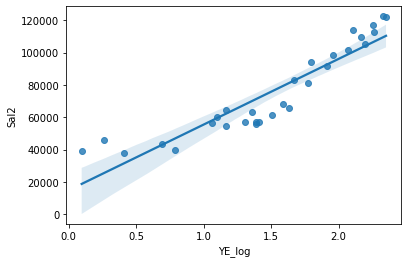

In [31]:
sns.regplot(x='YE_log', y='Sal2', data=data2)

In [32]:
model2.params

Intercept    14927.97177
YE_log       40581.98796
dtype: float64

In [33]:
model2.fittedvalues

0      18795.848339
1      25575.235192
2      31382.551905
3      43057.262306
4      46925.138875
5      58136.050079
6      59511.842441
7      62130.943929
8      62130.943929
9      68022.718504
10     70159.105863
11     71186.552842
12     71186.552842
13     72188.628149
14     75966.422577
15     79422.295729
16     81045.791737
17     82606.829882
18     86959.066704
19     87641.132977
20     92720.502137
21     94472.514696
22     98805.371390
23    100317.918684
24    102719.920751
25    104095.713112
26    106289.868435
27    106714.814600
28    109571.007247
29    110351.454145
dtype: float64

In [34]:
data2['Predicted2']=model2.fittedvalues
data2.head(2)

,YE2,Sal2,YE_log,Predicted2
0,1.1,39343.0,0.095310,18795.848339
1,1.3,46205.0,0.262364,25575.235192


In [35]:
data2['Error2']=data2['YE_log']-data2['Predicted2']
data2.head(2)

,YE2,Sal2,YE_log,Predicted2,Error2
0,1.1,39343.0,0.095310,18795.848339,-18795.753029
1,1.3,46205.0,0.262364,25575.235192,-25574.972827


In [36]:
data2['Error_sqr2']=(data2['Error2'])**2
data2.head(2)

,YE2,Sal2,YE_log,Predicted2,Error2,Error_sqr2
0,1.1,39343.0,0.095310,18795.848339,-18795.753029,3.532803e+08
1,1.3,46205.0,0.262364,25575.235192,-25574.972827,6.540792e+08


In [37]:
mean_squared_error2 = data2['Error_sqr2'].mean()
mean_squared_error2

6396546316.198903

In [38]:
model2.rsquared
# model is 85.38 % accurate

0.8538888828756969

In [39]:
model2.pvalues

Intercept    7.268813e-03
YE_log       3.250155e-13
dtype: float64

# SQUARE ROOT TRANSFORMATION OF INDEPENDEMT VARIABLE

In [40]:
data.head(2)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0


In [41]:
data3=data.rename(columns={'YearsExperience':'YE3','Salary':'Sal3'})
data3

,YE3,Sal3
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [42]:
# application of log transformation
data3['YE_sqrt']=data3['YE3'].transform([np.sqrt])
data3

,YE3,Sal3,YE_sqrt
0,1.1,39343.0,1.048809
1,1.3,46205.0,1.140175
2,1.5,37731.0,1.224745
3,2.0,43525.0,1.414214
4,2.2,39891.0,1.483240
5,2.9,56642.0,1.702939
6,3.0,60150.0,1.732051
7,3.2,54445.0,1.788854
8,3.2,64445.0,1.788854
9,3.7,57189.0,1.923538


In [43]:
model3 = smf.ols("Sal3~YE_sqrt",data=data3).fit()

<AxesSubplot:xlabel='YE_sqrt', ylabel='Sal3'>

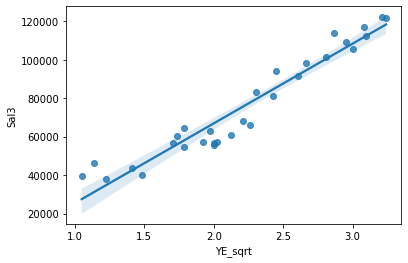

In [44]:
sns.regplot(x='YE_sqrt', y='Sal3', data=data3)

In [45]:
model3.params

Intercept   -16055.769117
YE_sqrt      41500.680583
dtype: float64

In [46]:
model3.fittedvalues

0      27470.511884
1      31262.287009
2      34771.976586
3      42635.056211
4      45499.687794
5      54617.343293
6      55825.518202
7      58182.905200
8      58182.905200
9      63772.383867
10     65901.508208
11     66945.592049
12     66945.592049
13     67976.704394
14     71980.468875
15     75809.903446
16     77665.963118
17     79485.972499
18     84749.033766
19     85599.722290
20     92164.765553
21     94526.218887
22    100589.939171
23    102784.094601
24    106353.652306
25    108446.272632
26    111857.919142
27    112529.386687
28    117134.909368
29    118421.805716
dtype: float64

In [47]:
data3['Predicted3']=model3.fittedvalues
data3.head(2)

,YE3,Sal3,YE_sqrt,Predicted3
0,1.1,39343.0,1.048809,27470.511884
1,1.3,46205.0,1.140175,31262.287009


In [48]:
data3['Error3']=data3['YE_sqrt']-data3['Predicted3']
data3.head(2)

,YE3,Sal3,YE_sqrt,Predicted3,Error3
0,1.1,39343.0,1.048809,27470.511884,-27469.463075
1,1.3,46205.0,1.140175,31262.287009,-31261.146833


In [49]:
data3['Error_sqr3']=(data3['Error3'])**2
data3.head(2)

,YE3,Sal3,YE_sqrt,Predicted3,Error3,Error_sqr3
0,1.1,39343.0,1.048809,27470.511884,-27469.463075,7.545714e+08
1,1.3,46205.0,1.140175,31262.287009,-31261.146833,9.772593e+08


In [50]:
mean_squared_error3 = data3['Error_sqr3'].mean()
mean_squared_error3

6452457737.861392

In [51]:
model3.rsquared

0.9310009544993526

In [52]:
model3.pvalues

Intercept    2.906965e-03
YE_sqrt      8.565358e-18
dtype: float64

# RECIPROCAL TRANSFORMATION OF INDEPENDEMT VARIABLE

In [53]:
data.head(2)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0


In [54]:
data4=data.rename(columns={'YearsExperience':'YE4','Salary':'Sal4'})
data4

,YE4,Sal4
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [55]:
# application of reciprocal transformaton
data4['YE_rec4']=data4['YE4'].transform([np.reciprocal])
data4

,YE4,Sal4,YE_rec4
0,1.1,39343.0,0.909091
1,1.3,46205.0,0.769231
2,1.5,37731.0,0.666667
3,2.0,43525.0,0.500000
4,2.2,39891.0,0.454545
5,2.9,56642.0,0.344828
6,3.0,60150.0,0.333333
7,3.2,54445.0,0.312500
8,3.2,64445.0,0.312500
9,3.7,57189.0,0.270270


In [56]:
model4 = smf.ols("Sal4~YE_rec4",data=data4).fit()

<AxesSubplot:xlabel='YE_rec4', ylabel='Sal4'>

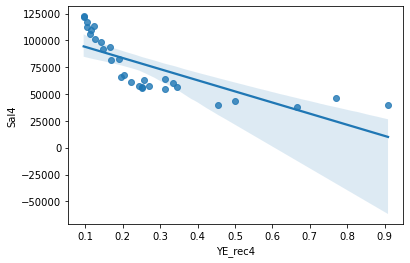

In [58]:
sns.regplot(x='YE_rec4', y='Sal4', data=data4)

In [59]:
model4.params

Intercept    104273.335111
YE_rec4     -103620.843905
dtype: float64

In [60]:
model4.fittedvalues

0     10072.567925
1     24564.993646
2     35192.772508
3     52462.913159
4     57172.951518
5     68542.009627
6     69733.053810
7     71891.821391
8     71891.821391
9     76267.701624
10    77703.887956
11    78368.124135
12    78368.124135
13    78999.958549
14    81246.480910
15    83126.224110
16    83955.522581
17    84722.232488
18    86710.480212
19    87003.194461
20    89034.975714
21    89678.850054
22    91156.772592
23    91636.646830
24    92362.893283
25    92759.908011
26    93365.877858
27    93479.497205
28    94213.059004
29    94404.683311
dtype: float64

In [61]:
data4['Predicted4']=model4.fittedvalues
data4.head(2)

,YE4,Sal4,YE_rec4,Predicted4
0,1.1,39343.0,0.909091,10072.567925
1,1.3,46205.0,0.769231,24564.993646


In [62]:
data4['Error4']=data4['YE_rec4']-data4['Predicted4']
data4.head(2)

,YE4,Sal4,YE_rec4,Predicted4,Error4
0,1.1,39343.0,0.909091,10072.567925,-10071.658834
1,1.3,46205.0,0.769231,24564.993646,-24564.224415


In [63]:
data4['Error_sqr4']=(data4['Error4'])**2
data4.head(2)

,YE4,Sal4,YE_rec4,Predicted4,Error4,Error_sqr4
0,1.1,39343.0,0.909091,10072.567925,-10071.658834,1.014383e+08
1,1.3,46205.0,0.769231,24564.993646,-24564.224415,6.034011e+08


In [64]:
mean_squared_error4 = data4['Error_sqr4'].mean()
mean_squared_error4

6204036702.161086

In [65]:
model4.rsquared

0.5885951068932687

In [66]:
model4.pvalues

Intercept    1.926358e-17
YE_rec4      7.581006e-07
dtype: float64

# SQUARE TRANSFORMATION OF INDEPENDEMT VARIABLE

In [67]:
data.head(2)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0


In [68]:
data5=data.rename(columns={'YearsExperience':'YE5','Salary':'Sal5'})
data5

,YE5,Sal5
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [69]:
#applicaion of square transformation
data5['YE_sqr5']=data5['YE5'].transform([np.square])
data5

,YE5,Sal5,YE_sqr5
0,1.1,39343.0,1.21
1,1.3,46205.0,1.69
2,1.5,37731.0,2.25
3,2.0,43525.0,4.00
4,2.2,39891.0,4.84
5,2.9,56642.0,8.41
6,3.0,60150.0,9.00
7,3.2,54445.0,10.24
8,3.2,64445.0,10.24
9,3.7,57189.0,13.69


In [70]:
model5 = smf.ols("Sal5~YE_sqr5",data=data5).fit()

<AxesSubplot:xlabel='YE_sqr5', ylabel='Sal5'>

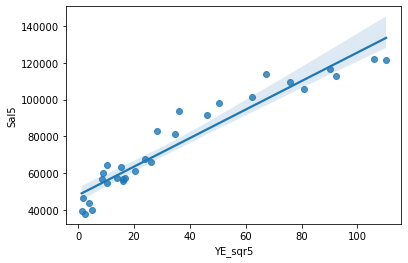

In [71]:
sns.regplot(x='YE_sqr5', y='Sal5', data=data5)

In [72]:
model5.params

Intercept    48042.585515
YE_sqr5        776.318773
dtype: float64

In [73]:
model5.fittedvalues

0      48981.931230
1      49354.564241
2      49789.302755
3      51147.860608
4      51799.968377
5      54571.426398
6      55029.454474
7      55992.089753
8      55992.089753
9      58670.389521
10     59850.394057
11     60463.685888
12     60463.685888
13     61092.504094
14     63763.040674
15     66681.999262
16     68234.636808
17     69849.379857
18     75066.242014
19     75990.061354
20     83939.565592
21     87176.814877
22     96492.640157
23    100242.259832
24    106802.153466
25    110924.406153
26    118105.354806
27    119588.123663
28    130402.244175
29    133631.730272
dtype: float64

In [74]:
data5['Predicted5']=model5.fittedvalues
data5.head(2)

,YE5,Sal5,YE_sqr5,Predicted5
0,1.1,39343.0,1.21,48981.931230
1,1.3,46205.0,1.69,49354.564241


In [75]:
data5['Error5']=data5['YE_sqr5']-data5['Predicted5']
data5.head(2)

,YE5,Sal5,YE_sqr5,Predicted5,Error5
0,1.1,39343.0,1.21,48981.931230,-48980.721230
1,1.3,46205.0,1.69,49354.564241,-49352.874241


In [76]:
data5['Error_sqr5']=(data5['Error5'])**2
data5.head(2)

,YE5,Sal5,YE_sqr5,Predicted5,Error5,Error_sqr5
0,1.1,39343.0,1.21,48981.931230,-48980.721230,2.399111e+09
1,1.3,46205.0,1.69,49354.564241,-49352.874241,2.435706e+09


In [77]:
mean_squared_error5 = data5['Error_sqr5'].mean()
mean_squared_error5

6434249721.204195

In [78]:
model5.rsquared
#mdoel is 91.53 % accurate

0.9153198857852565

In [79]:
model5.pvalues

Intercept    3.389190e-19
YE_sqr5      1.518127e-16
dtype: float64

# NO TRANSFORMATION HAS 95.69 % ACCURACY AND IT IS THE HIGHEST OF ALL.